## Pre-Processing & Training

In [2]:
import pandas as pd

path = "C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\hotels_post_datawrangling.csv"

hotels = pd.read_csv(path)

hotels.head(2)

,Hotel_Address,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Total_Number_of_Reviews,Positive_Review,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Month,Year,Day,country,Trip_type,Group_type
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,1403,Only the park outside of the hotel was beauti...,7,2.9,0 days,52.360576,4.915968,8,2017,3,Netherlands,1.0,2
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Ireland,No Negative,1403,No real complaints the hotel was great great ...,7,7.5,0 days,52.360576,4.915968,8,2017,3,Netherlands,1.0,2


For this notebook, we will use Reviewer_Score as a threshold to outline a review as positive or negative, hence rounding the Reviewer Score will be benenfitial towards the end. 

In [3]:
reviews = hotels[['Positive_Review', 'Negative_Review', 'Reviewer_Score']]
reviews['Reviewer_Score'] = hotels['Reviewer_Score'].round(0).astype(int)


C:\Users\hanna\AppData\Local\Temp/ipykernel_12016/2885099020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Reviewer_Score'] = hotels['Reviewer_Score'].round(0).astype(int)


In [4]:
reviews.head(2)

,Positive_Review,Negative_Review,Reviewer_Score
0,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,3
1,No real complaints the hotel was great great ...,No Negative,8


First step: Lower the text. 

In [5]:
%%time

reviews['Pos_lower'] = reviews['Positive_Review'].str.lower()
reviews['Neg_lower'] = reviews['Negative_Review'].str.lower()

# drop the new columns created 
reviews.drop(['Positive_Review'], axis = 1, inplace = True)
reviews.drop(['Negative_Review'], axis = 1, inplace = True)

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 540 ms


C:\Users\hanna\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
reviews.head(2)

,Reviewer_Score,Pos_lower,Neg_lower
0,3,only the park outside of the hotel was beauti...,i am so angry that i made this post available...
1,8,no real complaints the hotel was great great ...,no negative


Second step: Remove Punctuation. 

In [8]:
import string

In [9]:
%%time

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

reviews["Pos_wo_punct"] = reviews["Pos_lower"].apply(lambda text: remove_punctuation(text))
reviews["Neg_wo_punct"] = reviews["Neg_lower"].apply(lambda text: remove_punctuation(text))

reviews.drop(['Pos_lower'], axis = 1, inplace = True)
reviews.drop(['Neg_lower'], axis = 1, inplace = True)

reviews.head()

<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 3.29 s


<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hanna\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Reviewer_Score,Pos_wo_punct,Neg_wo_punct
0,3,only the park outside of the hotel was beauti...,i am so angry that i made this post available...
1,8,no real complaints the hotel was great great ...,no negative
2,7,location was good and staff were ok it is cut...,rooms are nice but for elderly a bit difficul...
3,4,great location in nice surroundings the bar a...,my room was dirty and i was afraid to walk ba...
4,7,amazing location and building romantic setting,you when i booked with your company on line y...


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

Third step: Remove Stopwords. 

In [12]:
%%time

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove('no')

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

reviews["Pos_wo_stop"] = reviews["Pos_wo_punct"].apply(lambda text: remove_stopwords(text))
reviews["Neg_wo_stop"] = reviews["Neg_wo_punct"].apply(lambda text: remove_stopwords(text))

reviews.drop(['Pos_wo_punct'], axis = 1, inplace = True)
reviews.drop(['Neg_wo_punct'], axis = 1, inplace = True)

reviews.head()

<timed exec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 3.92 s


<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hanna\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Reviewer_Score,Pos_wo_stop,Neg_wo_stop
0,3,park outside hotel beautiful,angry made post available via possible sites u...
1,8,no real complaints hotel great great location ...,no negative
2,7,location good staff ok cute hotel breakfast ra...,rooms nice elderly bit difficult rooms two sto...
3,4,great location nice surroundings bar restauran...,room dirty afraid walk barefoot floor looked c...
4,7,amazing location building romantic setting,booked company line showed pictures room thoug...


Fourth step: Lemmatize the text. 

In [13]:
%%time
#nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

reviews["Pos_lemmatized"] = reviews["Pos_wo_stop"].apply(lambda text: lemmatize_words(text))
reviews["Neg_lemmatized"] = reviews["Neg_wo_stop"].apply(lambda text: lemmatize_words(text))



<timed exec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 22min 46s


<timed exec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
reviews.drop(['Pos_wo_stop'], axis = 1, inplace = True)
reviews.drop(['Neg_wo_stop'], axis = 1, inplace = True)

C:\Users\hanna\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
reviews.head()

,Reviewer_Score,Pos_lemmatized,Neg_lemmatized
0,3,park outside hotel beautiful,angry make post available via possible site us...
1,8,no real complaint hotel great great location s...,no negative
2,7,location good staff ok cute hotel breakfast ra...,room nice elderly bit difficult room two story...
3,4,great location nice surroundings bar restauran...,room dirty afraid walk barefoot floor look cle...
4,7,amaze location building romantic setting,book company line show picture room think get ...


Next up, we join both the positive and negative reviews in a new column.

In [16]:
reviews['review'] = reviews[['Pos_lemmatized', 'Neg_lemmatized']].agg(' '.join, axis=1)

C:\Users\hanna\AppData\Local\Temp/ipykernel_12016/4137053768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['review'] = reviews[['Pos_lemmatized', 'Neg_lemmatized']].agg(' '.join, axis=1)


In [17]:
reviews.head()

,Reviewer_Score,Pos_lemmatized,Neg_lemmatized,review
0,3,park outside hotel beautiful,angry make post available via possible site us...,park outside hotel beautiful angry make post a...
1,8,no real complaint hotel great great location s...,no negative,no real complaint hotel great great location s...
2,7,location good staff ok cute hotel breakfast ra...,room nice elderly bit difficult room two story...,location good staff ok cute hotel breakfast ra...
3,4,great location nice surroundings bar restauran...,room dirty afraid walk barefoot floor look cle...,great location nice surroundings bar restauran...
4,7,amaze location building romantic setting,book company line show picture room think get ...,amaze location building romantic setting book ...


In [18]:
reviews.drop(['Pos_lemmatized'], axis = 1, inplace = True)
reviews.drop(['Neg_lemmatized'], axis = 1, inplace = True)

C:\Users\hanna\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
reviews.head()

,Reviewer_Score,review
0,3,park outside hotel beautiful angry make post a...
1,8,no real complaint hotel great great location s...
2,7,location good staff ok cute hotel breakfast ra...
3,4,great location nice surroundings bar restauran...
4,7,amaze location building romantic setting book ...


If the score is 7.5 or higher, it marks it as 1 - Positive Review Score, otherwise a Negative Review Score is assigned. 

In [20]:
reviews["Reviewer_Score"] = reviews["Reviewer_Score"].apply(lambda x: 1 if x > 7.4 else 0)

C:\Users\hanna\AppData\Local\Temp/ipykernel_12016/2454791991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["Reviewer_Score"] = reviews["Reviewer_Score"].apply(lambda x: 1 if x > 7.4 else 0)


In [21]:
reviews["Reviewer_Score"].value_counts(normalize = True)

1    0.782609
0    0.217391
Name: Reviewer_Score, dtype: float64

Because in a lot of the spaces we saw no reviews, so instead of having No Positive/Negative that can affect our model, let us replace that with empty space.

In [22]:
reviews["review"] = reviews["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


C:\Users\hanna\AppData\Local\Temp/ipykernel_12016/2677648345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["review"] = reviews["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


In [23]:
reviews.head()

,Reviewer_Score,review
0,0,park outside hotel beautiful angry make post a...
1,1,no real complaint hotel great great location s...
2,0,location good staff ok cute hotel breakfast ra...
3,0,great location nice surroundings bar restauran...
4,0,amaze location building romantic setting book ...


#### Train/Test Split

We create a train/test split so we can use a vectorizer to transform our text data into a vector to create a generic model to start with. 

from sklearn.model_selection import train_test_split

X_train, X_value = train_test_split(reviews, stratify = reviews['Reviewer_Score'], test_size = 0.25, random_state = 0)

In [26]:
X_train['Reviewer_Score'].value_counts(normalize = True)

1    0.782608
0    0.217392
Name: Reviewer_Score, dtype: float64

In [27]:
X_value['Reviewer_Score'].value_counts(normalize = True)

1    0.782611
0    0.217389
Name: Reviewer_Score, dtype: float64

#### Vectorization 

In [28]:
%%time
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X_train['review'])

train_cv_vectors = count_vectorizer.transform(X_train['review'])
test_cv_vectors = count_vectorizer.transform(X_value['review'])

print("Train Vector Shape")
print(train_cv_vectors.shape)
print("Test Vector Shape")
print(test_cv_vectors.shape)

# Print the first 10 features of the count_vec
# print("Every feature:\n{}".formMat(count_vectorizer.get_feature_names()))
list(count_vectorizer.vocabulary_)[:10]


train_cv_vectors.dtype

Train Vector Shape
(386803, 64132)
Test Vector Shape
(128935, 64132)
Wall time: 21.5 s


dtype('int64')

In [29]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# word level
tfidf = TfidfVectorizer(analyzer='word')

tfidf.fit(X_train['review'])

train_tf_vector = tfidf.transform(X_train['review'])
test_tf_vector = tfidf.transform(X_value["review"])

print("Train Vector Shape")
print(train_tf_vector.shape)
print("Test Vector Shape")
print(test_tf_vector.shape)

list(tfidf.vocabulary_)[:10]

Train Vector Shape
(386803, 64132)
Test Vector Shape
(128935, 64132)
Wall time: 22.4 s


['minibar',
 'fruit',
 'basket',
 'clean',
 'sheet',
 'toilet',
 'no',
 'negative',
 'hotel',
 'reception']

In [30]:
%%time
from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False)
hash_vectorizer.fit(X_train['review'])

train_hash_vectors = hash_vectorizer.transform(X_train['review'])
test_hash_vectors = hash_vectorizer.transform(X_value['review'])

print("Train Vector Shape")
print(train_hash_vectors.shape)
print("Test Vector Shape")
print(test_hash_vectors.shape)

# list(hash_vectorizer.vocabulary_)[:10]

Train Vector Shape
(386803, 10000)
Test Vector Shape
(128935, 10000)
Wall time: 9.57 s


#### Generic Model - with CV



[Test] Accuracy score (y_predict_test, y_test): 0.8530344747353318


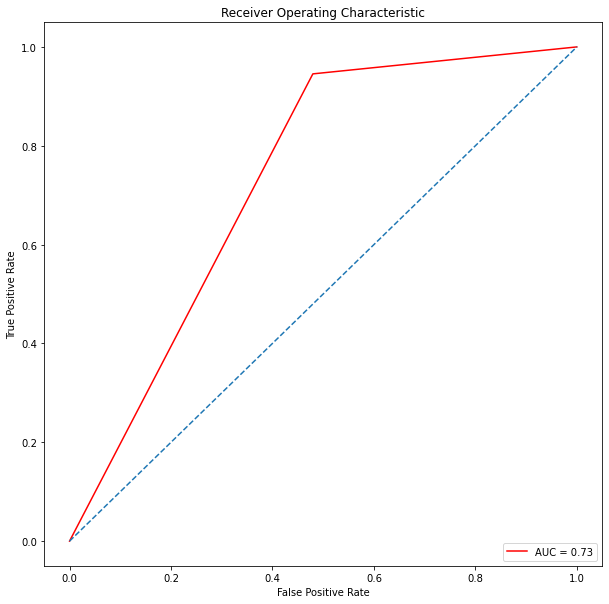

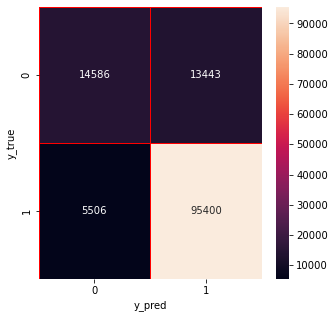

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.73      0.52      0.61     28029
           1       0.88      0.95      0.91    100906

    accuracy                           0.85    128935
   macro avg       0.80      0.73      0.76    128935
weighted avg       0.84      0.85      0.84    128935

Wall time: 1min 5s


In [31]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter = 999)

# Fit the model on the training data.M
clf.fit(train_cv_vectors, X_train['Reviewer_Score']) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test_cv = clf.predict(test_cv_vectors)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_predict_test_cv, X_value['Reviewer_Score']))



from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(X_value['Reviewer_Score'], y_predict_test_cv)

roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc




import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')




from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(X_value['Reviewer_Score'], y_predict_test_cv)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


from sklearn.metrics import classification_report

print("[Test Classification Report]")
print(classification_report(X_value['Reviewer_Score'], y_predict_test_cv))

#### Generic Model - with TF-IDF



[Test] Accuracy score (y_predict_test, y_test): 0.8555008337534417


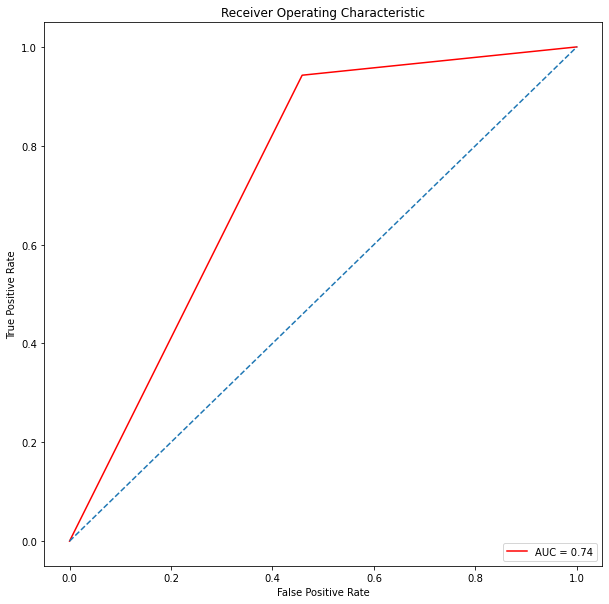

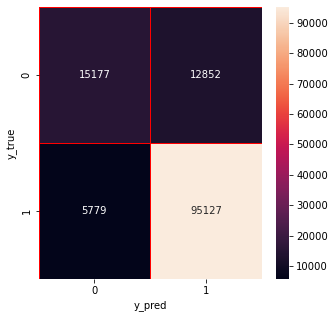

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.72      0.54      0.62     28029
           1       0.88      0.94      0.91    100906

    accuracy                           0.86    128935
   macro avg       0.80      0.74      0.77    128935
weighted avg       0.85      0.86      0.85    128935

Wall time: 30.2 s


In [32]:
%%time

clf = LogisticRegression(max_iter = 999)

# Fit the model on the training data.
clf.fit(train_tf_vector, X_train['Reviewer_Score']) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test_tf = clf.predict(test_tf_vector)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_predict_test_tf, X_value['Reviewer_Score']))




false_positive_rate, true_positive_rate, thresholds = roc_curve(X_value['Reviewer_Score'], y_predict_test_tf)

roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc




plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')





cm = confusion_matrix(X_value['Reviewer_Score'], y_predict_test_tf)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()




from sklearn.metrics import classification_report

print("[Test Classification Report]")
print(classification_report(X_value['Reviewer_Score'], y_predict_test_tf))

In [36]:
#### Generic Model - with Hash Vectorization



[Test] Accuracy score (y_predict_test, y_test): 0.8500794974211812
roc_auc is:
0.7421018886876974


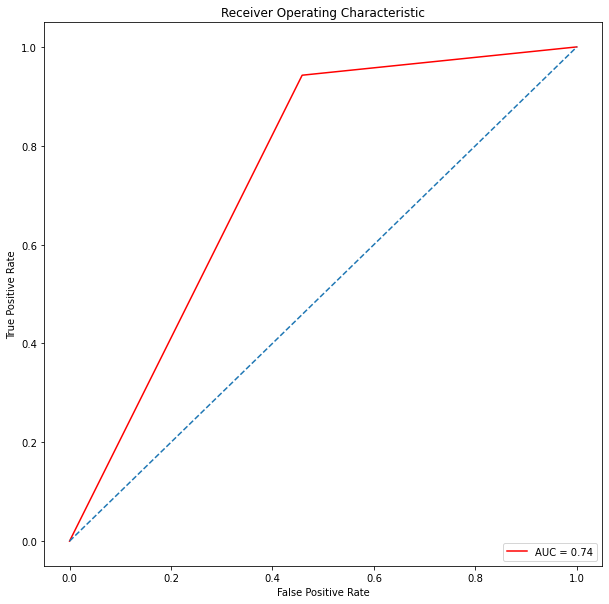

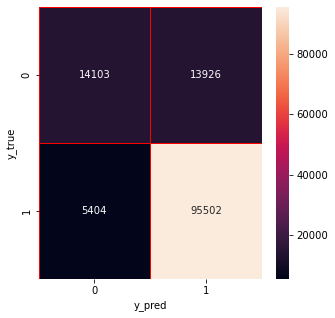

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.72      0.50      0.59     28029
           1       0.87      0.95      0.91    100906

    accuracy                           0.85    128935
   macro avg       0.80      0.72      0.75    128935
weighted avg       0.84      0.85      0.84    128935

Done
Wall time: 51.4 s


In [33]:
%%time

clf = LogisticRegression(max_iter = 999)

# Fit the model on the training data.
clf.fit(train_hash_vectors, X_train['Reviewer_Score']) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test_hash = clf.predict(test_hash_vectors)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_predict_test_hash, X_value['Reviewer_Score']))

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(X_value['Reviewer_Score'], y_predict_test_tf)

roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc is:")
print(roc_auc)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

cm = confusion_matrix(X_value['Reviewer_Score'], y_predict_test_hash)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

from sklearn.metrics import classification_report

print("[Test Classification Report]")
print(classification_report(X_value['Reviewer_Score'], y_predict_test_hash))
print("Done")

In [34]:
# %%time
# train_cv_df = pd.DataFrame.sparse.from_spmatrix(train_cv_vectors)   
# test_cv_df = pd.DataFrame.sparse.from_spmatrix(test_cv_vectors)

# train_tf_df = pd.DataFrame.sparse.from_spmatrix(train_tf_vector)
# test_tf_df = pd.DataFrame.sparse.from_spmatrix(test_tf_vector)

# train_hash_df = pd.DataFrame.sparse.from_spmatrix(train_hash_vectors)
# test_hash_df = pd.DataFrame.sparse.from_spmatrix(test_hash_vectors)


In [35]:
# %%time

# train_cv_df.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\Pre-processing-notebooks\\train_cv_df.csv', index = # False)
# test_cv_df.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\Pre-processing-notebooks\\test_cv_df.csv', index = # False)


# train_tf_df.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\Pre-processing-notebooks\\train_tf_df.csv', index = False)
# test_tf_df.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\Pre-processing-notebooks\\test_tf_df.csv', index = False)

# train_hash_df.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\Pre-processing-notebooks\\train_hash_df.csv', index = False)
# test_hash_df.to_csv('C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Capstone 3\\Pre-processing-notebooks\\test_hash_df.csv', index = False)


The method of a model we are interested in is Recall Method. We want to be sure that our model is doing a great a job at finding false negatives as we do not want to affect the hotels ratings because of our model. 

In this generic case, we see that our model is overfitting and the desired score for recall is not ideal, it is 0.5. 

This is a sign that we are on the right track, we just need to clean the textual data more before creating a model. 